## Ciao raga

Elisabetta ti odio  solo per il fatto che non leggerai mai questo codice.
Ciao Antonino.nfjdshfuidsfcewd
Ciao **SIMONINI**fdjfdsj


aggiungo cose





In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import odr

In [48]:
df = pd.read_excel(r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Magistrale\Lab4\Esperienze_lab\Esperienza1\Misura_Kb_tensione.xlsx" )
c = df["Capacità (nF)"]
v = df["V2 (V)"]
err_c_temp = df["Err C (nF)"]
err_c = err_c_temp / c**2
err_v = df["Err V ( V)"]

In [58]:
from scipy import odr
import numpy as np

def linear_func(B, x):
    return B[0] * x + B[1]

linear_model = odr.Model(linear_func)

c_rev = 1 / c 

data = odr.RealData(c_rev, v, sx=err_c, sy=err_v)

fit = odr.ODR(data, linear_model, beta0=[1, 0])  # parametri iniziali [pendenza, intercetta]

output = fit.run()
par, cov = output.beta, output.cov_beta
dev_std = output.sd_beta


In [37]:
c = df["Capacità (nF)"]
c = np.array(c)
c

array([1, 2, 4, 5, 3, 6, 7, 5, 9], dtype=int64)

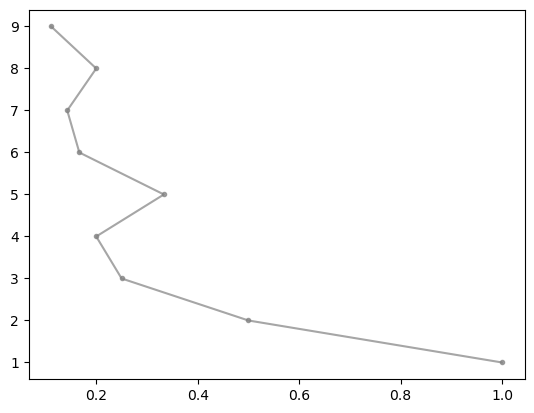

In [60]:
fig, ax = plt.subplots()
ax.plot(c_rev, v, markersize=6, alpha = 0.7, marker = ".", color="gray")
ax.plot(c_rev, linear_func(par,))